In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

2025-01-08 20:43:28.206928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-08 20:43:30.333102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load test data
test_data = np.load("../data2.npy")

# Normalize pixel values
test_data = test_data.astype('float32') / 255.0

# Add channel dimension if needed
if len(test_data.shape) == 3:
    test_data = test_data[..., np.newaxis]

test_labels = np.load("../lab2.npy")

In [3]:
# Load the model
custom_objects = {
    'MeanSquaredError': tf.keras.losses.MeanSquaredError
}
model = tf.keras.models.load_model('digit_sum_model.h5', custom_objects=custom_objects)

2025-01-08 20:43:35.642792: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# Generate predictions
predictions = model.predict(test_data)

mae = mean_absolute_error(test_labels, predictions)
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)

# Calculate accuracy (predictions within ±0.5 of true value)
accurate_predictions = np.abs(predictions - test_labels) < 0.5
accuracy = np.mean(accurate_predictions) * 100

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"Accuracy (predictions within ±0.5 of true value): {accuracy:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step

Model Performance Metrics:
Mean Absolute Error: 3.34
Root Mean Square Error: 4.05
Accuracy (predictions within ±0.5 of true value): 5.01%


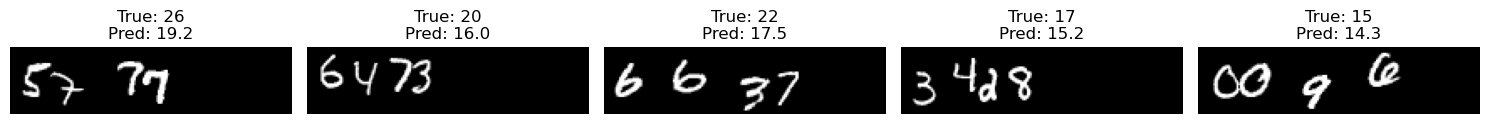

In [6]:
# Randomly select samples
indices = np.random.choice(len(test_data), 5, replace=False)

# Create figure
plt.figure(figsize=(15, 3))

for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data[idx].squeeze(), cmap='gray')
    plt.axis('off')
    pred_value = predictions[idx][0]
    true_value = test_labels[idx] if test_labels is not None else "Unknown"
    plt.title(f'True: {true_value}\nPred: {pred_value:.1f}')

plt.tight_layout()
plt.show()